SMS Spam Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3742,ham,"Nah, Wednesday. When should I bring the mini c...",NaN,NaN,NaN
2407,ham,Solve d Case : A Man Was Found Murdered On &l...,NaN,NaN,NaN
5394,ham,I dont know exactly could you ask chechi.,NaN,NaN,NaN
1007,ham,I don't quite know what to do. I still can't g...,NaN,NaN,NaN
994,ham,"I can't, I don't have her number!",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(5)

,v1,v2
3643,ham,* Thought I didn't see you.
4384,spam,Do you want a New Nokia 3510i Colour Phone Del...
1026,ham,Yes da. Any plm at ur office
3296,spam,Todays Voda numbers ending 5226 are selected t...
5203,ham,Me fine..absolutly fine


In [7]:
# as the column names are not to descriptive lets rename the names of the columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [8]:
df.sample(5)

,message_type,message
2252,ham,Den wat will e schedule b lk on sun?
4311,ham,I keep ten rs in my shelf:) buy two egg.
2851,ham,how tall are you princess?
4909,ham,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...
1356,ham,U ned to convince him tht its not possible wit...


In [9]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [10]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

771     0
5230    0
339     0
1999    0
1660    0
Name: message_type, dtype: int64

In [11]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [13]:
# now lets check for duplicated values
df.duplicated().sum()

403

In [14]:
#remove the duplicates
df= df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

**2. Exploratory Data Analysis**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:

df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

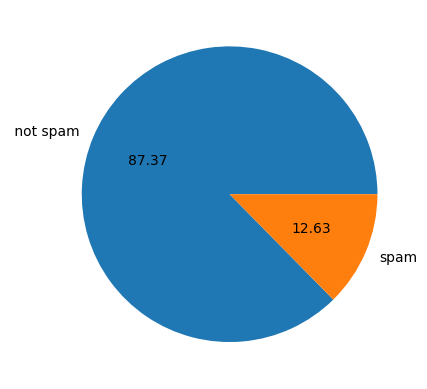

In [18]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

**there is imbalance in data**
**Now lets make 3 new columns in the data depicting the no. of characters,words and sentences**

In [23]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [26]:
#now find the length of each of the list to get the total number of words in each list
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
4112,0,Thought we could go out for dinner. I'll treat...,60,16
926,0,But I'm on a diet. And I ate 1 too many slices...,92,26
2974,0,"Don't worry, * is easy once have ingredients!",45,11
895,0,Superb Thought- \Be grateful that u dont have ...,150,32
3043,0,Let me know how it changes in the next 6hrs. I...,169,39


In [27]:
#finding number of sentences
df['num_sentences']=df['message'].apply(lambda x: nltk.sent_tokenize(x))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
4087,0,He needs to stop going to bed and make with th...,63,13,[He needs to stop going to bed and make with t...
5289,0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,50,15,"[Hey!, Congrats 2u2., id luv 2 but ive had 2 g..."
3651,0,"Probably not, still going over some stuff here",46,9,"[Probably not, still going over some stuff here]"
2332,0,We are both fine. Thanks,24,6,"[We are both fine., Thanks]"
80,0,"Sorry, I'll call later",22,6,"[Sorry, I'll call later]"


In [28]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
3327,0,No we put party 7 days a week and study lightl...,126,28,1
5302,0,About &lt;#&gt; bucks. The banks fees are fix...,87,25,3
1238,0,"Dear relieved of westonzoyland, all going to p...",63,13,1
2061,0,Hey ! I want you ! I crave you ! I miss you ! ...,96,27,6
1195,1,You have 1 new voicemail. Please call 08719181503,49,9,2


In [29]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


For 'ham' messages

In [30]:
# lets check describe() for both ham and spam individually
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


For 'spam' messages

In [31]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


we can clearly see the spam messages are quite longer than the ham messages

<Axes: xlabel='num_characters', ylabel='Count'>

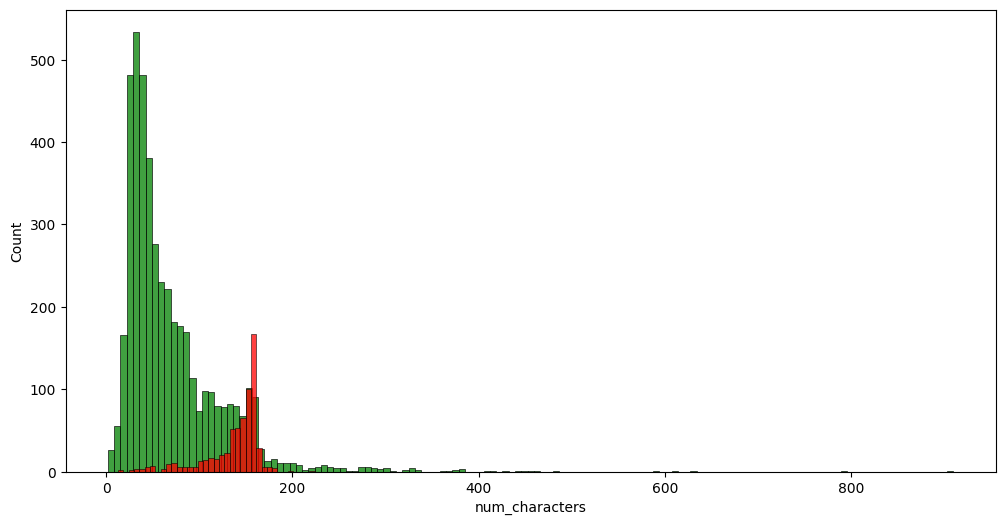

In [32]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

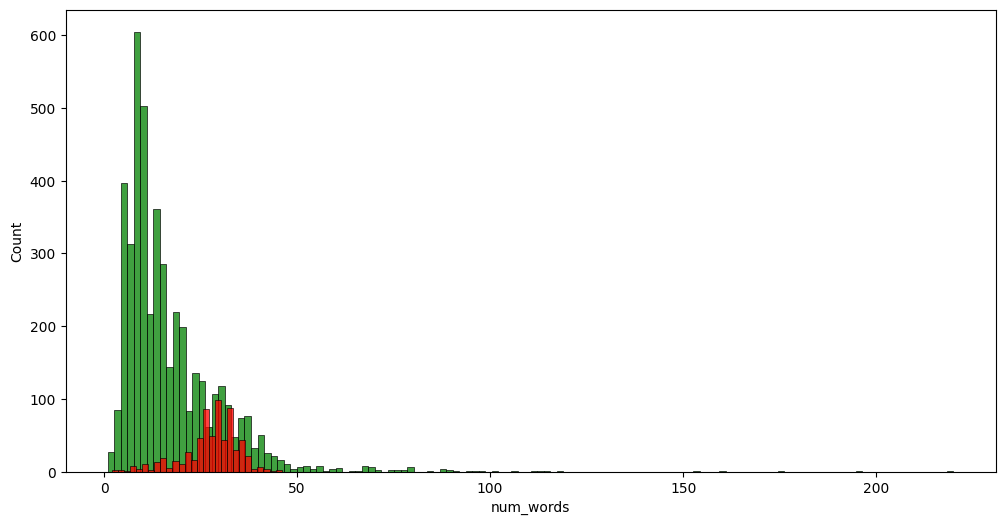

In [33]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

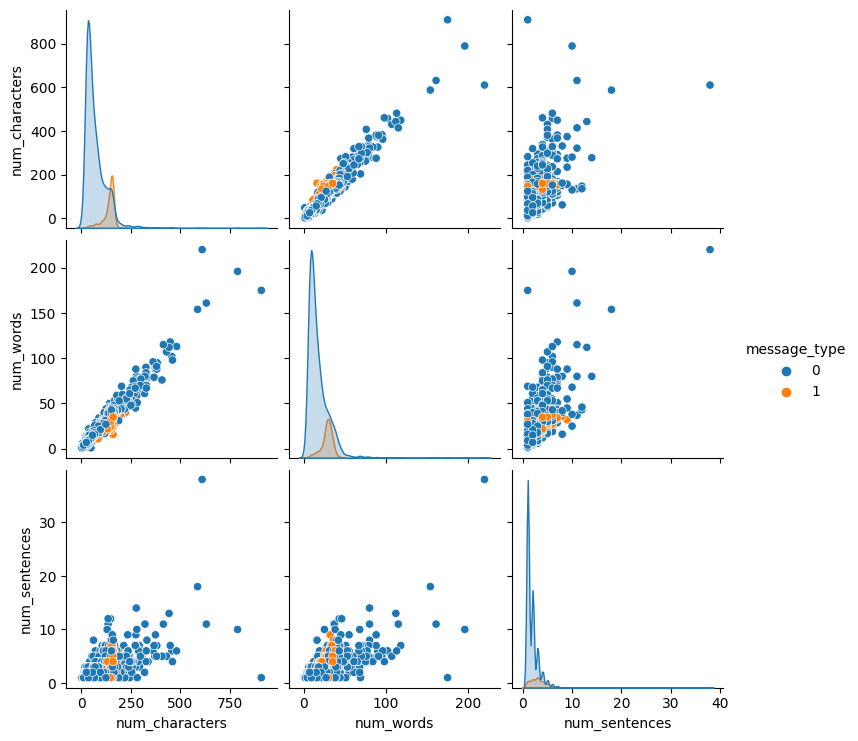

In [34]:
#plot pairplots for ham and spam
sns.pairplot(df,hue='message_type')

In [35]:
#find correlation
df.corr()

<ipython-input-35-d1ed9bd844cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,message_type,num_characters,num_words,num_sentences
message_type,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-36-e915062b8451>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

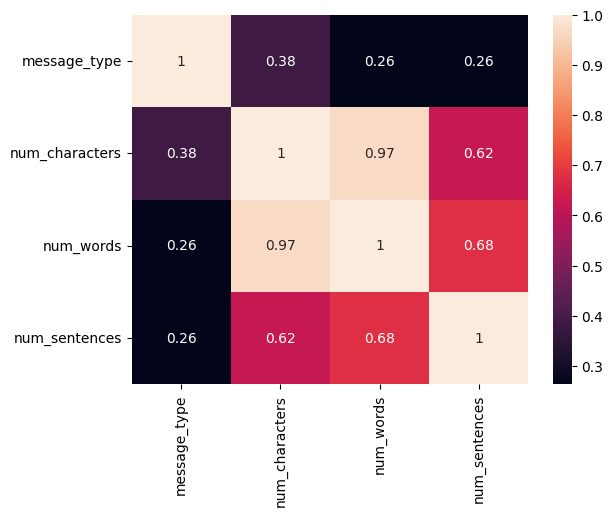

In [36]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
3.1 LowerCase

3.2 Tokenisation

3.3 Removing special characters

3.4 Removing stop words and punctuation

3.5 Stemming --lemmetization

In [45]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():
            y.append(i)
    #now lets assign the y list back to the message
    #message = y   !!!!list can never be copied this way it is immutable data type so we have to do it by CLONING
    message=y[:]
    y.clear() #now y is cleared

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    ##now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)#returns in the form of string

In [43]:
## Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) #length of stopwords available

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [47]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
##stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('playing')

#we got the stemmed version of the word

'play'

In [50]:
text_transform("This is a SMS spam CLassifier playing,wasn't $3000")

'sm spam classifi play 3000'

# Now lets apply the text_transform function to all the messages in the dataset

In [51]:
df['message'].apply(text_transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [52]:
df['transformed_msg']=df['message'].apply(text_transform)

In [53]:
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now we have to work basically on 2 columns the "transformed_msg" and "message_type"

# Word Cloud

In [54]:
#drawing a word cloud of maximum occuring words in the messages
from wordcloud import WordCloud
#create its object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
##word cloud for SPAM
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

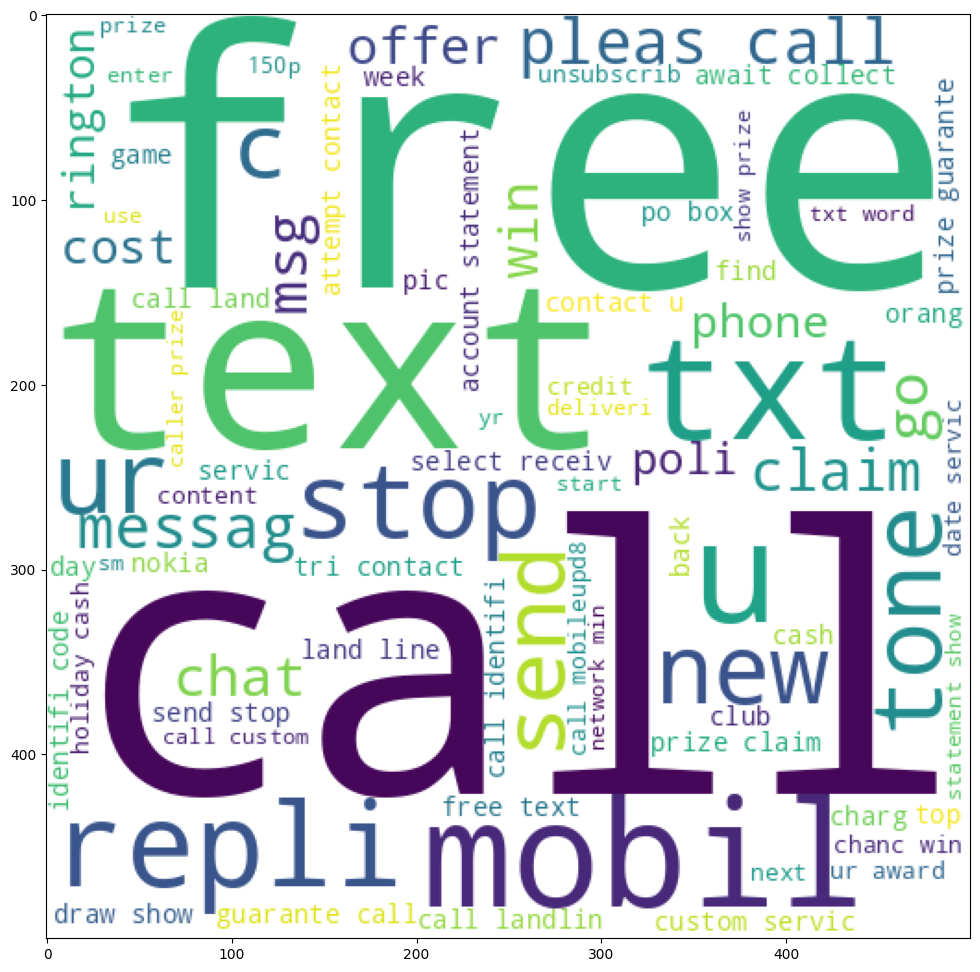

In [56]:
#display the word cloud---SPAM
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [57]:
## word cloud for ham messages
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=" "))

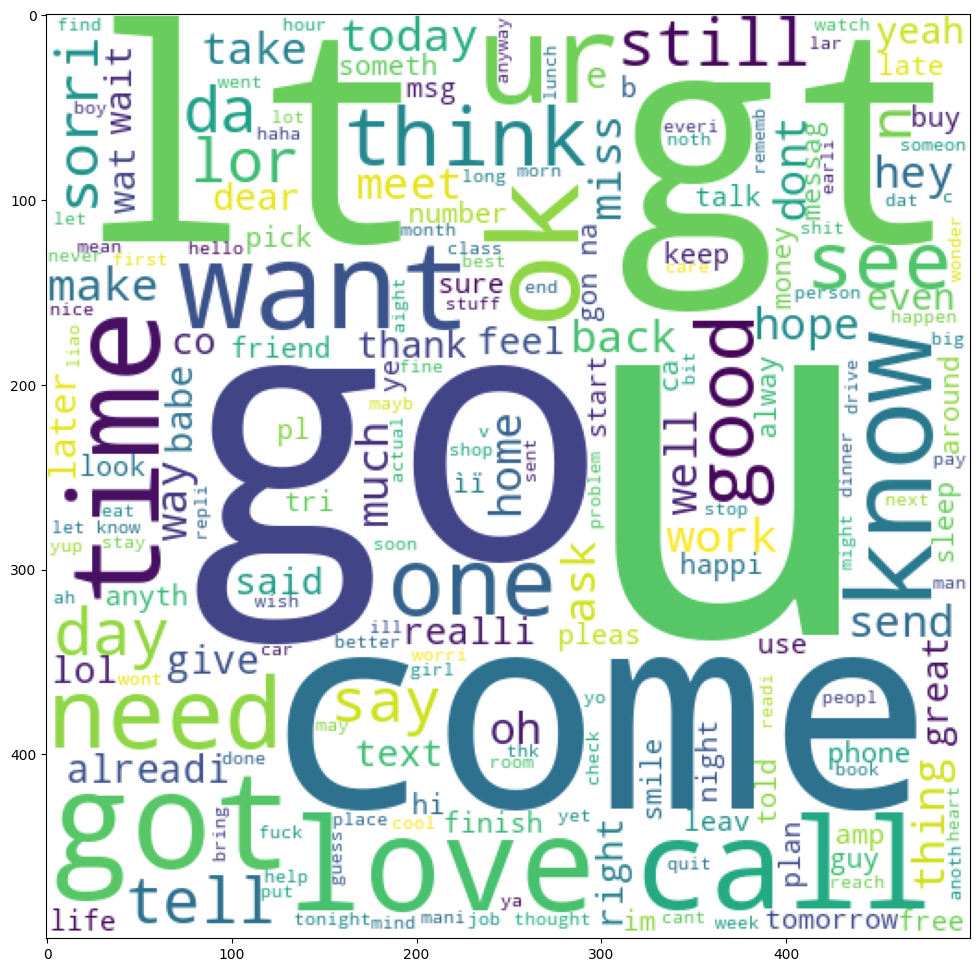

In [58]:
#show the wordcloud for ham messages
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

Lets find the top 30 words used in Ham and Spam

In [59]:
##finding the top 30 words used in Ham and spam
##lets write a custom code for this
df[df['message_type']==1]['transformed_msg'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [60]:
##Lets print all the spam messages
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [61]:
 len(spam_corpus)

9939

In [62]:
## now lets find the most occuring words
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [63]:
#Top 30
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [66]:
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: ignored

<Figure size 1800x1200 with 0 Axes>

In [68]:
# Find top 30 words for HAM
ham_corpus=[]
for msg in df[df['message_type']==0]['transformed_msg']:
    for word in msg.split():
        ham_corpus.append(word)

# 4. Model Building

How to vectorize:
Bag of Words

TFIDF

Word2vec


# Here we will be using BAG OF WORDS

In [71]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [72]:
## toarray to convert from sparse array to dense array
X=cv.fit_transform(df['transformed_msg']).toarray()

In [73]:
X.shape

(5169, 6708)

In [74]:
y=df['message_type'].values

**TRAIN TEST SPLIT**

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8800773694390716
Confusion Matrix of Guassian NB is:  [[792 104]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5315315315315315


In [80]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9642166344294004
Confusion Matrix of Multinomial NB is:  [[871  25]
 [ 12 126]]
Precision score of the Multinomial NB is 0.8344370860927153


In [81]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9700193423597679
Confusion Matrix of Bernoulli NB is:  [[893   3]
 [ 28 110]]
Precision score of the Bernoulli NB is 0.9734513274336283


# Lets try with TFID Vectorizer

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf= TfidfVectorizer(max_features=3000)

**Done for Model Improvement--> Scaling**

In [84]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()

In [85]:
X.shape

(5169, 3000)

In [86]:
y=df['message_type'].values

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [89]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [90]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8694390715667312
Confusion Matrix of Guassian NB is:  [[788 108]
 [ 27 111]]
Precision score of the Gaussian NB is 0.5068493150684932


In [91]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9709864603481625
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 30 108]]
Precision score of the Multinomial NB is 1.0


Here precision is 1 which is very good as there will be no FALSE POSITIVE

In [92]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9835589941972921
Confusion Matrix of Bernoulli NB is:  [[895   1]
 [ 16 122]]
Precision score of the Bernoulli NB is 0.991869918699187


# We are chosing MNB with TFIDF

Lets compare other classification algorithms with MNB

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [94]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [95]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [96]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [97]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [98]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [100]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [101]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [102]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [103]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


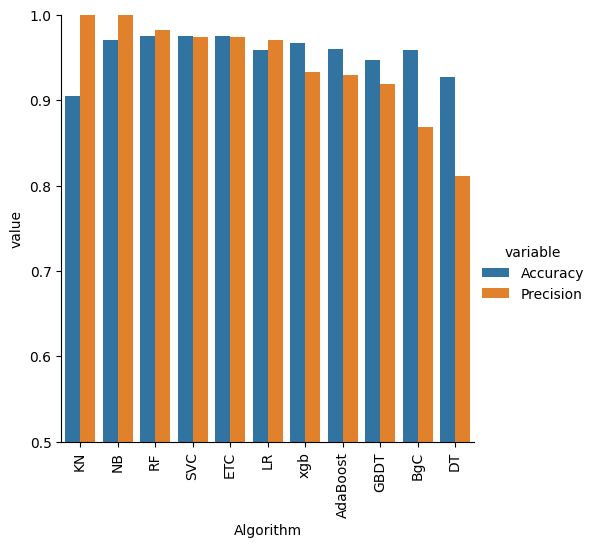

In [104]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Improvement

In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [106]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [107]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [108]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [109]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})

In [110]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [111]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#wb --> write binary
pickle.dump(mnb,open('model.pkl','wb'))